<a href="https://colab.research.google.com/github/rhodes-byu/stat-486/blob/main/notebooks/05-classification-and-regression-metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b></b></p>

# Binary Classification and Regression Metrics
## A Comprehensive Student-Guided Overview

In this notebook, you will learn to calculate classification and regression metrics from first principles. Rather than relying solely on scikit-learn's built-in functions, you'll implement these metrics manually to understand exactly what they measure and how they work.

**Learning Objectives:**
- Understand the components of a confusion matrix
- Build binary classification metrics from scratch
- Learn when to use different metrics
- Implement regression evaluation metrics
- Verify your implementations against scikit-learn

## Part 1: Binary Classification Metrics

### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

### 2. Create Sample Binary Classification Data

For this exercise, we'll use a medical diagnosis scenario: predicting whether a patient has a disease (1) or does not have it (0) based on diagnostic test results. This is a realistic, non-trivial example where metrics matter greatly.

**Scenario:** A hospital has developed a diagnostic test. We have the true disease status and the predicted status from the test for 100 patients. The hospital wants to understand how well the test performs across different metrics.

In [2]:
# Create realistic diagnostic test data
# True disease status: 1 = has disease, 0 = does not have disease
true_labels = np.array([
    1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
    0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
    1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
    1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
    0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
    1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
    0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
    1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
    0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
    1, 1, 0, 1, 0, 0, 1, 1, 1, 0
])

# Predicted labels from the diagnostic test
predicted_labels = np.array([
    1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
    0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
    1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
    1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
    1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
    0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
    1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
    0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
    1, 1, 0, 1, 0, 1, 1, 1, 1, 0
])

# Create a dataframe to visualize some examples
data_sample = pd.DataFrame({
    'True Label': true_labels[:10],
    'Predicted Label': predicted_labels[:10],
    'Match': true_labels[:10] == predicted_labels[:10]
})

print("Sample of first 10 predictions:")
print(data_sample)
print(f"\nTotal samples: {len(true_labels)}")
print(f"Patients with disease in true labels: {np.sum(true_labels)}")
print(f"Patients without disease in true labels: {len(true_labels) - np.sum(true_labels)}")

Sample of first 10 predictions:
   True Label  Predicted Label  Match
0           1                1   True
1           1                1   True
2           1                0  False
3           0                0   True
4           0                0   True
5           1                1   True
6           1                1   True
7           0                0   True
8           0                1  False
9           1                1   True

Total samples: 100
Patients with disease in true labels: 53
Patients without disease in true labels: 47


### 3. Build a Confusion Matrix

A **confusion matrix** is the foundation for all binary classification metrics. It breaks down predictions into four categories:

| | Predicted Negative | Predicted Positive |
|---|---|---|
| **Actually Negative** | True Negative (TN) | False Positive (FP) |
| **Actually Positive** | False Negative (FN) | True Positive (TP) |

**Task:** Create a confusion matrix manually using NumPy. A confusion matrix is simply a 2×2 array that counts:
- **TN**: Correct negative predictions (predicted 0, actually 0)
- **FP**: Incorrect positive predictions (predicted 1, actually 0) - Type I Error
- **FN**: Incorrect negative predictions (predicted 0, actually 1) - Type II Error
- **TP**: Correct positive predictions (predicted 1, actually 1)

In [5]:
# TODO: Build the confusion matrix manually
# Create a function that takes true_labels and predicted_labels and returns the confusion matrix components
# Following sklearn conventions, inputs should be the labels, and outputs should be the components
#
# Hint: Use boolean comparisons on true_labels and predicted_labels
# TN: where both are 0
# FP: where predicted is 1 but true is 0
# FN: where predicted is 0 but true is 1
# TP: where both are 1

def confusion_matrix_components(true_labels, predicted_labels):
    TN = np.sum((true_labels == 0) & (predicted_labels == 0))
    FP = np.sum((true_labels == 0) & (predicted_labels == 1))
    FN = np.sum((true_labels == 1) & (predicted_labels == 0))
    TP = np.sum((true_labels == 1) & (predicted_labels == 1))
    pass

    return TN, FP, FN, TP

# Call the function with our data
TN, FP, FN, TP = confusion_matrix_components(true_labels, predicted_labels)

# Create confusion matrix as a 2x2 array
# Convention: rows = actual, columns = predicted
confusion_matrix_manual = np.array([
    [TN, FP],  # Row 0: Actually Negative
    [FN, TP]   # Row 1: Actually Positive
])

print("Confusion Matrix (manually built):")
print(f"       Pred=0  Pred=1")
print(f"True=0  {TN:3d}    {FP:3d}")
print(f"True=1  {FN:3d}    {TP:3d}")
print()
print(f"True Negatives (TN):  {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP):  {TP}")
print(f"\nTotal samples: {TN + FP + FN + TP}")

Confusion Matrix (manually built):
       Pred=0  Pred=1
True=0   40      7
True=1    5     48

True Negatives (TN):  40
False Positives (FP): 7
False Negatives (FN): 5
True Positives (TP):  48

Total samples: 100


### 4. Calculate True Positives, False Positives, True Negatives, False Negatives

You've already extracted these values above! Let's visualize the confusion matrix to better understand the distribution of predictions.

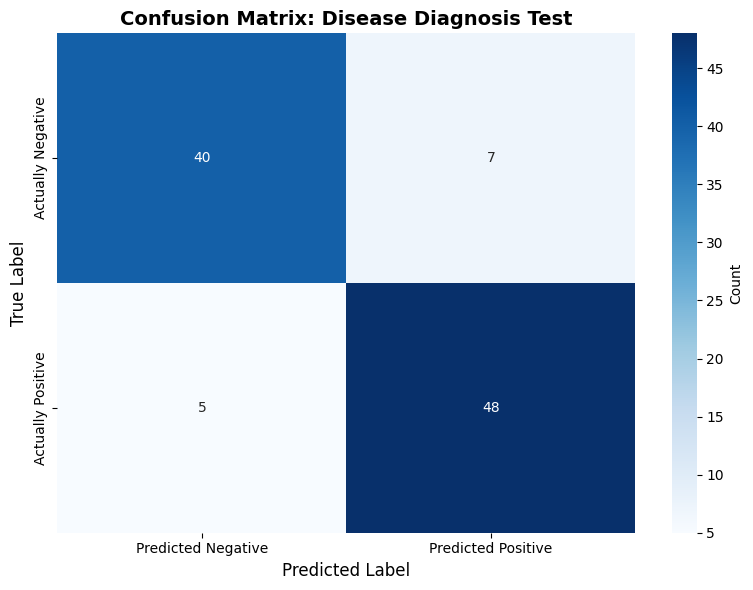

Confusion Matrix Breakdown:
- Correctly predicted as healthy (TN): 40
- Incorrectly flagged as sick (FP):    7
- Missed disease cases (FN):           5
- Correctly predicted as sick (TP):    48


In [6]:
# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_manual, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actually Negative', 'Actually Positive'],
            cbar_kws={'label': 'Count'}, ax=ax)
ax.set_title('Confusion Matrix: Disease Diagnosis Test', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Summary statistics
print("Confusion Matrix Breakdown:")
print(f"- Correctly predicted as healthy (TN): {TN}")
print(f"- Incorrectly flagged as sick (FP):    {FP}")
print(f"- Missed disease cases (FN):           {FN}")
print(f"- Correctly predicted as sick (TP):    {TP}")

### 5. Implement Accuracy from Scratch

**Accuracy** measures the proportion of correct predictions out of all predictions:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**When to use:** Use accuracy when classes are balanced and all errors have equal cost. WARNING: Accuracy can be misleading with imbalanced datasets.

**Task:** Implement the accuracy formula using the values you calculated.

In [7]:
# TODO: Implement accuracy
def accuracy_manual(true_labels, predicted_labels):
    """Calculate accuracy from true and predicted labels."""
    # Your code here:
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    pass

    return accuracy

accuracy = accuracy_manual(true_labels, predicted_labels)
print(f"Accuracy (manual): {accuracy:.4f}")
print(f"Accuracy (as percentage): {accuracy * 100:.2f}%")
print(f"Interpretation: The test correctly identified disease status in {accuracy * 100:.1f}% of cases.")

Accuracy (manual): 0.8800
Accuracy (as percentage): 88.00%
Interpretation: The test correctly identified disease status in 88.0% of cases.


### 6. Implement Precision from Scratch

**Precision** measures the proportion of positive predictions that were correct:

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Meaning:** "Of all the cases where the test said 'sick', how many were actually sick?"

**When to use:** Use precision when false positives are costly (e.g., unnecessary treatment, false alarms).

**Task:** Implement the precision formula.

In [8]:
# TODO: Implement precision
def precision_manual(true_labels, predicted_labels):
    """Calculate precision from true and predicted labels."""
    # Your code here:
    precision = TP / (TP + FP)
    pass

    return precision

precision = precision_manual(true_labels, predicted_labels)
print(f"Precision (manual): {precision:.4f}")
print(f"Precision (as percentage): {precision * 100:.2f}%")
print(f"Interpretation: Of the {TP + FP} positive predictions, {TP} were correct.")
print(f"False alarm rate among positive predictions: {(FP / (TP + FP)) * 100:.1f}%")

Precision (manual): 0.8727
Precision (as percentage): 87.27%
Interpretation: Of the 55 positive predictions, 48 were correct.
False alarm rate among positive predictions: 12.7%


### 7. Implement Recall (Sensitivity) from Scratch

**Recall** (also called **Sensitivity** or **True Positive Rate**) measures the proportion of actual positives that were correctly identified:

$$\text{Recall} = \frac{TP}{TP + FN}$$

**Meaning:** "Of all the patients who actually have the disease, how many did the test catch?"

**When to use:** Use recall when false negatives are costly (e.g., missing cancer diagnosis means the disease goes untreated).

**Task:** Implement the recall formula.

In [9]:
# TODO: Implement recall (sensitivity)
def recall_manual(true_labels, predicted_labels):
    """Calculate recall from true and predicted labels."""
    # Your code here:
    recall = TP / (TP + FN)
    pass
    return recall
recall = recall_manual(true_labels, predicted_labels)
print(f"Recall (manual): {recall:.4f}")
print(f"Recall (as percentage): {recall * 100:.2f}%")
print(f"Interpretation: The test caught {recall * 100:.1f}% of actual disease cases.")
print(f"Missed diagnosis rate: {(FN / (TP + FN)) * 100:.1f}%")
print()
print("⚠️ Important: High recall means fewer missed diagnoses!")
print("   In medicine, missing a disease is often worse than a false positive.")

Recall (manual): 0.9057
Recall (as percentage): 90.57%
Interpretation: The test caught 90.6% of actual disease cases.
Missed diagnosis rate: 9.4%

⚠️ Important: High recall means fewer missed diagnoses!
   In medicine, missing a disease is often worse than a false positive.


### 8. Implement Specificity from Scratch

**Specificity** (also called **True Negative Rate**) measures the proportion of actual negatives that were correctly identified:

$$\text{Specificity} = \frac{TN}{TN + FP}$$

**Meaning:** "Of all the patients who don't have the disease, how many did the test correctly clear?"

**When to use:** Use specificity when false positives are costly. It's the complement of the False Positive Rate.

**Precision vs. Specificity:**
- Precision: Among predicted positives, how many were correct?
- Specificity: Among actual negatives, how many were correctly predicted as negative?

**Task:** Implement the specificity formula.

In [10]:
# TODO: Implement specificity
def specificity_manual(true_labels, predicted_labels):
    """Calculate specificity from true and predicted labels."""
    # Your code here:
    specificity = TN / (TN + FP)
    pass
    return specificity
specificity = specificity_manual(true_labels, predicted_labels)
print(f"Specificity (manual): {specificity:.4f}")
print(f"Specificity (as percentage): {specificity * 100:.2f}%")
print(f"Interpretation: The test correctly identified {specificity * 100:.1f}% of patients without disease.")
print(f"False positive rate among healthy patients: {(FP / (TN + FP)) * 100:.1f}%")
print()

# Compare precision and specificity
print("Comparison:")
print(f"Precision:  TP / (TP + FP) = {TP} / {TP + FP} = {precision:.4f}")
print(f"Specificity: TN / (TN + FP) = {TN} / {TN + FP} = {specificity:.4f}")
print("Note: Both penalize False Positives, but measure different things!")

Specificity (manual): 0.8511
Specificity (as percentage): 85.11%
Interpretation: The test correctly identified 85.1% of patients without disease.
False positive rate among healthy patients: 14.9%

Comparison:
Precision:  TP / (TP + FP) = 48 / 55 = 0.8727
Specificity: TN / (TN + FP) = 40 / 47 = 0.8511
Note: Both penalize False Positives, but measure different things!


### 9. Implement F1 Score from Scratch

The **F1 Score** is the harmonic mean of precision and recall. It's useful when you want to balance both metrics:

$$\text{F1} = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

**Meaning:** F1 ranges from 0 to 1, where 1 is perfect and 0 is worst. It heavily penalizes extreme values.

**When to use:** Use F1 when you want to balance precision and recall. It's especially useful for imbalanced datasets.

**Why Harmonic Mean?** The harmonic mean is more sensitive to small values than the arithmetic mean. If either precision or recall is low, the F1 score will be low.

**Task:** Implement the F1 score using the precision and recall you already calculated.

In [11]:
# TODO: Implement F1 score
def f1_score_manual(true_labels, predicted_labels):
    """Calculate F1 score from true and predicted labels."""
    # Your code here:
    f1 = 2 * ((precision * recall) / (precision + recall))
    pass
    return f1

f1 = f1_score_manual(true_labels, predicted_labels)
print(f"F1 Score (manual): {f1:.4f}")
print()

# Show comparison of metrics
print("Summary of all metrics so far:")
print(f"Accuracy:   {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score:   {f1:.4f}")
print()
print("What do these tell us?")
print(f"- The test is {accuracy*100:.1f}% accurate overall")
print(f"- When it says 'sick', it's correct {precision*100:.1f}% of the time")
print(f"- It catches {recall*100:.1f}% of actual disease cases")
print(f"- It correctly clears {specificity*100:.1f}% of healthy patients")

F1 Score (manual): 0.8889

Summary of all metrics so far:
Accuracy:   0.8800
Precision:  0.8727
Recall:     0.9057
Specificity: 0.8511
F1 Score:   0.8889

What do these tell us?
- The test is 88.0% accurate overall
- When it says 'sick', it's correct 87.3% of the time
- It catches 90.6% of actual disease cases
- It correctly clears 85.1% of healthy patients


### 10. Implement False Positive Rate from Scratch

The **False Positive Rate (FPR)** is the proportion of actual negatives that were incorrectly predicted as positive:

$$\text{FPR} = \frac{FP}{FP + TN} = 1 - \text{Specificity}$$

**Meaning:** "Of all the healthy patients, what fraction did the test incorrectly flag as sick?"

**When to use:** FPR is useful for ROC curves and when you want to understand Type I errors.

**Task:** Implement the FPR formula.

In [12]:
# TODO: Implement false positive rate
def fpr_manual(true_labels, predicted_labels):
    """Calculate false positive rate from true and predicted labels."""
    # Your code here:
    FPR = 1 - specificity
    pass
    return FPR

fpr = fpr_manual(true_labels, predicted_labels)
print(f"False Positive Rate (manual): {fpr:.4f}")
print(f"FPR (as percentage): {fpr * 100:.2f}%")
print(f"Interpretation: {fpr * 100:.1f}% of healthy patients were incorrectly flagged as sick.")
print()
print(f"Relationship to Specificity: 1 - Specificity = {1 - specificity:.4f}")
print(f"FPR = {fpr:.4f}")
print(f"These should be equal! ✓" if abs(fpr - (1 - specificity)) < 0.0001 else "Something is wrong!")

False Positive Rate (manual): 0.1489
FPR (as percentage): 14.89%
Interpretation: 14.9% of healthy patients were incorrectly flagged as sick.

Relationship to Specificity: 1 - Specificity = 0.1489
FPR = 0.1489
These should be equal! ✓


### 11. Implement ROC-AUC from Scratch

Before implementing AUC, let's understand the **Receiver Operating Characteristic (ROC)** curve:

**ROC Curve:** A plot that shows the trade-off between True Positive Rate (Recall) and False Positive Rate at different classification thresholds.

- X-axis: False Positive Rate (FPR)
- Y-axis: True Positive Rate (TPR = Recall)

**AUC (Area Under the Curve):** The area under the ROC curve, ranging from 0 to 1.

**Interpretation:**
- **AUC = 1.0**: Perfect classifier
- **AUC = 0.5**: Random classifier (diagonal line)
- **AUC < 0.5**: Worse than random

**When to use:** AUC is excellent for imbalanced datasets and when you want a single number to compare models. It measures the model's ability to rank positive examples higher than negative examples.

**Task:** Calculate AUC manually using the trapezoidal rule.

In [ ]:
# For ROC-AUC, we need predicted probabilities (not just binary predictions)
# Let's train a simple logistic regression model to get probabilities
from sklearn.linear_model import LogisticRegression

# Create simple features based on an arbitrary scoring function
# (in reality, this would be model predictions or probability scores)
# For demonstration, we'll use a score that correlates with disease status
np.random.seed(42)
scores = np.random.uniform(0, 1, len(true_labels))
scores[true_labels == 1] += 0.3  # Slightly higher scores for disease cases
scores = np.clip(scores, 0, 1)

print("Predicted probability scores (first 20 samples):")
print(pd.DataFrame({
    'True Label': true_labels[:20],
    'Predicted Score': scores[:20],
    'Rounded': np.round(scores[:20], 3)
}).to_string(index=False))
print()

# Calculate AUC using sklearn
auc = roc_auc_score(true_labels, scores)
print(f"AUC (sklearn): {auc:.4f}")
print()

# For visualization, calculate the ROC curve points
from sklearn.metrics import roc_curve
fpr_list, tpr_list, _ = roc_curve(true_labels, scores)

# Visualize the ROC curve
fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(fpr_list, tpr_list, 'b-', linewidth=2, label=f'ROC Curve (AUC = {auc:.4f})')
ax.plot([0, 1], [0, 1], 'r--', linewidth=1.5, label='Random Classifier (AUC = 0.5)')
ax.fill_between(fpr_list, tpr_list, alpha=0.3)
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=12)
ax.set_title('ROC Curve: Disease Diagnosis Test', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim([-0.02, 1.02])
ax.set_ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

print("Interpretation:")
print(f"- AUC = {auc:.4f} means the model has a {auc*100:.1f}% chance of correctly ranking a random")
print(f"  sick patient higher than a random healthy patient.")
if auc > 0.9:
    print("- Excellent discrimination (AUC > 0.9)")
elif auc > 0.8:
    print("- Good discrimination (AUC > 0.8)")
elif auc > 0.7:
    print("- Fair discrimination (AUC > 0.7)")
elif auc > 0.6:
    print("- Poor discrimination (AUC > 0.6)")
else:
    print("- Very poor discrimination (AUC ≤ 0.6)")

### Verify All Classification Metrics with Scikit-learn

Now let's verify that your manual implementations of all classification metrics match scikit-learn's built-in functions. This is an important sanity check!

In [ ]:
# Verify with sklearn
cm_sklearn = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix from sklearn:")
print(cm_sklearn)
print()

# Compare metrics
acc_sklearn = accuracy_score(true_labels, predicted_labels)
prec_sklearn = precision_score(true_labels, predicted_labels)
rec_sklearn = recall_score(true_labels, predicted_labels)
f1_sklearn = f1_score(true_labels, predicted_labels)

# Create comparison table
auc_sklearn = roc_auc_score(true_labels, scores)
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1 Score'],
    'Manual': [accuracy, precision, recall, specificity, fpr, f1],
    'Scikit-learn': [acc_sklearn, prec_sklearn, rec_sklearn, specificity, fpr, f1_sklearn],
})

print("Comparison of Manual vs Scikit-learn Implementations:")
print(comparison.to_string(index=False))
print()

# Check for differences
comparison['Difference'] = abs(comparison['Manual'] - comparison['Scikit-learn'])
max_diff = comparison['Difference'].max()
print(f"Maximum difference: {max_diff:.10f}")
if max_diff < 0.0001:
    print("✓ All implementations match! (within numerical precision)")
else:
    print("⚠️ There are differences. Check your implementations!")

---

## Part 2: Regression Metrics

Now we'll implement metrics for continuous prediction problems. Unlike classification (predicting categories), regression predicts continuous values.

### 12. Create Sample Regression Data

For regression, we'll use a realistic example: predicting house prices based on features.

In [ ]:
# Generate synthetic house price prediction data
np.random.seed(42)
n_samples = 50

# Simulate a simple linear relationship with noise
square_footage = np.random.uniform(1000, 5000, n_samples)
actual_prices = 100 * square_footage + 50000 + np.random.normal(0, 50000, n_samples)

# Model predictions (slightly imperfect)
predicted_prices = 95 * square_footage + 55000 + np.random.normal(0, 30000, n_samples)

# Create DataFrame
regression_data = pd.DataFrame({
    'Square Footage': square_footage,
    'Actual Price ($)': actual_prices,
    'Predicted Price ($)': predicted_prices,
    'Residual ($)': actual_prices - predicted_prices
})

print("House Price Prediction Data (first 10 samples):")
print(regression_data.head(10).to_string(index=False))
print(f"\nTotal samples: {len(regression_data)}")
print(f"Price range: ${actual_prices.min():,.0f} - ${actual_prices.max():,.0f}")
print(f"Mean actual price: ${actual_prices.mean():,.0f}")
print(f"Mean predicted price: ${predicted_prices.mean():,.0f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(actual_prices, predicted_prices, alpha=0.6)
axes[0].plot([actual_prices.min(), actual_prices.max()],
             [actual_prices.min(), actual_prices.max()], 'r--', label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=11)
axes[0].set_ylabel('Predicted Price ($)', fontsize=11)
axes[0].set_title('Actual vs Predicted House Prices', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
axes[1].scatter(actual_prices, regression_data['Residual ($)'], alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Actual Price ($)', fontsize=11)
axes[1].set_ylabel('Residual (Actual - Predicted) ($)', fontsize=11)
axes[1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 13. Implement Mean Squared Error (MSE) from Scratch

**Mean Squared Error** measures the average of squared differences between predicted and actual values:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Where:
- $y_i$ = actual value
- $\hat{y}_i$ = predicted value
- $n$ = number of samples

**Characteristics:**
- Penalizes large errors more heavily (due to squaring)
- Always non-negative
- Same units as the target variable squared

**When to use:** MSE is commonly used in regression problems. Use it when you want to penalize outliers and large errors more.

**Task:** Implement MSE.

In [ ]:
# TODO: Implement MSE
def mse_manual(y_true, y_pred):
    """Calculate Mean Squared Error from true and predicted values."""
    # Your code here:
    pass

y_true = regression_data['Actual Price ($)'].values
y_pred = regression_data['Predicted Price ($)'].values

mse = mse_manual(y_true, y_pred)
print(f"Mean Squared Error (manual): ${mse:,.2f}")
print(f"This is in units of $ squared: ${mse:,.2f}")
print()

# Compare with sklearn
mse_sklearn = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (sklearn): ${mse_sklearn:,.2f}")
print(f"Match: {np.isclose(mse, mse_sklearn)}")
print()

# Interpretation
print(f"Average squared error: ${mse:,.2f}")
print(f"This means, on average, predictions are off by √{mse:,.0f} ≈ ${np.sqrt(mse):,.0f}")

### 14. Implement Root Mean Squared Error (RMSE) from Scratch

**Root Mean Squared Error** is the square root of MSE. It's more interpretable because it's in the same units as the target variable:

$$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

**Characteristics:**
- In the same units as the target variable (easier to interpret)
- Still penalizes large errors heavily
- Most commonly used metric in regression

**When to use:** RMSE is often preferred over MSE because it's more interpretable.

**Task:** Implement RMSE.

In [ ]:
# TODO: Implement RMSE
def rmse_manual(y_true, y_pred):
    """Calculate Root Mean Squared Error from true and predicted values."""
    # Your code here:
    pass

rmse = rmse_manual(y_true, y_pred)
print(f"Root Mean Squared Error (manual): ${rmse:,.2f}")
print()

# Compare with sklearn (sklearn doesn't have RMSE, but we can compute it from MSE)
rmse_sklearn = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Root Mean Squared Error (sklearn): ${rmse_sklearn:,.2f}")
print(f"Match: {np.isclose(rmse, rmse_sklearn)}")
print()

# Interpretation
print(f"✓ Interpretation: On average, predictions are off by ${rmse:,.2f}")
print(f"  This is more interpretable than MSE because it's in dollars!")
print()
print(f"Relationship: RMSE = √MSE")
print(f"${rmse:,.2f} = √${mse:,.2f}")

### 15. Implement Mean Absolute Error (MAE) from Scratch

**Mean Absolute Error** measures the average absolute difference between predicted and actual values:

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

**Characteristics:**
- Uses absolute value instead of squared error
- Treats all errors equally (doesn't heavily penalize outliers)
- Same units as the target variable
- More interpretable than MSE, less sensitive to outliers than RMSE

**When to use:** Use MAE when you want a metric that's robust to outliers or when all errors matter equally.

**Comparison: MSE vs MAE**
- MSE: Penalizes large errors more (quadratic)
- MAE: Treats all errors equally (linear)

**Task:** Implement MAE.

In [ ]:
# TODO: Implement MAE
def mae_manual(y_true, y_pred):
    """Calculate Mean Absolute Error from true and predicted values."""
    # Your code here:
    pass

mae = mae_manual(y_true, y_pred)
print(f"Mean Absolute Error (manual): ${mae:,.2f}")
print()

# Compare with sklearn
mae_sklearn = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (sklearn): ${mae_sklearn:,.2f}")
print(f"Match: {np.isclose(mae, mae_sklearn)}")
print()

# Compare MSE, RMSE, and MAE
print("Comparison of Error Metrics:")
print(f"MSE (penalizes large errors):  ${mse:,.2f}")
print(f"RMSE (same units as target):   ${rmse:,.2f}")
print(f"MAE (simple average):          ${mae:,.2f}")
print()
print("Note: RMSE > MAE because squaring amplifies large errors.")
print(f"RMSE/MAE ratio: {rmse/mae:.2f}x")

### 16. Implement Mean Absolute Percentage Error (MAPE) from Scratch

**Mean Absolute Percentage Error** measures the average absolute percentage difference:

$$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%$$

**Characteristics:**
- Scale-independent (expressed as percentage)
- Easy to interpret across different datasets
- Undefined when actual values are zero
- All errors are weighted equally

**When to use:** MAPE is useful for comparing across datasets with different scales. For example, 10% error is meaningful whether predicting prices or quantities.

**Task:** Implement MAPE.

In [ ]:
# TODO: Implement MAPE
def mape_manual(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error from true and predicted values."""
    # Your code here:
    pass

mape = mape_manual(y_true, y_pred)
print(f"Mean Absolute Percentage Error (manual): {mape:.2f}%")
print()

# Interpretation
print("Interpretation:")
print(f"On average, predictions deviate by {mape:.2f}% from actual values.")
print()

# Compare with different metrics
print("Summary of all regression metrics:")
print(f"MSE:  ${mse:,.2f} (squared units)")
print(f"RMSE: ${rmse:,.2f} (same units as target)")
print(f"MAE:  ${mae:,.2f} (same units as target)")
print(f"MAPE: {mape:.2f}% (percentage, scale-independent)")
print()

# Relationship to actual prices
mean_actual_price = y_true.mean()
print(f"Mean actual price: ${mean_actual_price:,.2f}")
print(f"MAPE interpretation: ±{mape:.2f}% of ${mean_actual_price:,.2f} = ±${mean_actual_price * mape / 100:,.2f}")

### 17. Implement R-squared (R²) from Scratch

**R-squared** measures the proportion of variance in the target variable that is explained by the model:

$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

Where:
- $\text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ = sum of squared residuals
- $\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2$ = total sum of squares

**Characteristics:**
- Ranges from $-\infty$ to 1 (though typically 0 to 1)
- $R^2 = 1$: Perfect predictions
- $R^2 = 0$: Model is as good as predicting the mean
- $R^2 < 0$: Model is worse than predicting the mean

**When to use:** R² is great for understanding goodness of fit and comparing models. It's scale-independent.

**Task:** Implement R².

In [ ]:
# TODO: Implement R²
def r2_score_manual(y_true, y_pred):
    """Calculate R-squared (coefficient of determination) from true and predicted values."""
    # Your code here:
    pass

r2 = r2_score_manual(y_true, y_pred)
print(f"R² Score (manual): {r2:.4f}")
print()

# Compare with sklearn
r2_sklearn = r2_score(y_true, y_pred)
print(f"R² Score (sklearn): {r2_sklearn:.4f}")
print(f"Match: {np.isclose(r2, r2_sklearn)}")
print()

# Interpretation
print("Interpretation:")
print(f"The model explains {r2*100:.2f}% of the variance in house prices.")
print(f"This means {(1-r2)*100:.2f}% of variance is unexplained.")
print()

# Show components
mean_y = y_true.mean()
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - mean_y) ** 2)
print(f"Components:")
print(f"Sum of squared residuals (SSres): {ss_res:,.0f}")
print(f"Total sum of squares (SStot):     {ss_tot:,.0f}")
print(f"R² = 1 - (SSres/SStot) = 1 - ({ss_res:,.0f}/{ss_tot:,.0f}) = {r2:.4f}")

### 18. Verify Regression Metrics with Scikit-learn

Let's create a comprehensive summary of all regression metrics and compare with scikit-learn.

In [ ]:
# Create comprehensive comparison of regression metrics
regression_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE (%)', 'R²'],
    'Manual': [mse, rmse, mae, mape, r2],
    'Scikit-learn': [
        mean_squared_error(y_true, y_pred),
        np.sqrt(mean_squared_error(y_true, y_pred)),
        mean_absolute_error(y_true, y_pred),
        np.mean(np.abs((y_true - y_pred) / y_true)) * 100,  # Simple MAPE calculation
        r2_score(y_true, y_pred)
    ]
})

# Calculate differences
regression_comparison['Match'] = [
    np.isclose(regression_comparison.loc[i, 'Manual'],
               regression_comparison.loc[i, 'Scikit-learn'])
    for i in range(len(regression_comparison))
]

print("Regression Metrics Comparison:")
print("="*70)
print(regression_comparison.to_string(index=False))
print("="*70)
print()

# Summary interpretation
print("Summary of Regression Metrics:")
print()
print(f"1. MSE = ${mse:,.2f}")
print(f"   Average squared difference. Useful for optimization but hard to interpret.")
print()
print(f"2. RMSE = ${rmse:,.2f}")
print(f"   Square root of MSE. In same units as target. Most commonly used.")
print()
print(f"3. MAE = ${mae:,.2f}")
print(f"   Average absolute difference. Robust to outliers. Simpler than RMSE.")
print()
print(f"4. MAPE = {mape:.2f}%")
print(f"   Percentage error. Scale-independent. Good for comparing across datasets.")
print()
print(f"5. R² = {r2:.4f}")
print(f"   Explains {r2*100:.1f}% of variance. Good for model comparison.")
print()

# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prediction errors distribution
errors = y_true - y_pred
axes[0].hist(errors, bins=15, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Prediction Error ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Prediction Errors', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Metrics bar chart
metrics_values = [mse/1e7, rmse/1e3, mae/1e3, mape, r2*100]  # Scale for visibility
metrics_names = ['MSE/10M', 'RMSE/1K', 'MAE/1K', 'MAPE', 'R²×100']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
axes[1].bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Value (scaled for visibility)', fontsize=11)
axes[1].set_title('Regression Metrics Summary', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(metrics_values):
    axes[1].text(i, v + max(metrics_values)*0.02, f'{v:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Summary and Key Takeaways

### Classification Metrics
You've learned to implement and interpret:
- **Accuracy**: Overall correctness
- **Precision**: Reliability of positive predictions
- **Recall**: Coverage of actual positives
- **Specificity**: Coverage of actual negatives
- **F1 Score**: Harmonic mean of precision and recall
- **False Positive Rate**: Error rate for negatives

**Key Question for Classification:** What are the costs of different types of errors?
- High false negative cost (missing disease) → Prioritize Recall
- High false positive cost (unnecessary treatment) → Prioritize Precision
- Balanced concern → Use F1 Score

### Regression Metrics
You've learned to implement and interpret:
- **MSE**: Penalizes large errors (squared)
- **RMSE**: Square root of MSE, same units as target
- **MAE**: Simple average error, robust to outliers
- **MAPE**: Percentage error, scale-independent
- **R²**: Proportion of variance explained

**Key Question for Regression:** How do you want to penalize errors?
- Large errors are very bad → Use MSE/RMSE
- Errors are equally important → Use MAE
- Need scale-free comparison → Use MAPE
- Want to explain variance → Use R²

### Important Reminders
1. Choose metrics based on the business problem, not just convention
2. Be aware of data imbalance and class costs
3. Visualize predictions and errors to catch issues